# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Mean<br>
Section 2: Variance

##  Section 0: Preparing data

In [3]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [4]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [5]:
data = read.csv(file = "data/FORT_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [6]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 11

Check number of years in the data set.

In [7]:
data$YEAR[nrow(data)]-firstYear

[1] 118

In [8]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
119 119 119 119 119 119 119 119 119 119 119 119 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [9]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Mean

In [10]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [72]:
# create for maximum rainfall
maxTS = ts(data$Max.PRCP, start = firstYear, freq=12)

# create regression line
reg = lm(Max.PRCP. ~ month, data=data)

In [76]:
maxObs = max(na.omit(data$Max.PRCP.));maxObs

[1] 1176

In [77]:
which(data$Max.PRCP.==maxObs)

[1] 1219

In [80]:
data[1219,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.,month
1219,GHCND:USC00053005,FORT COLLINS CO US,1997,7,31,1176,1219


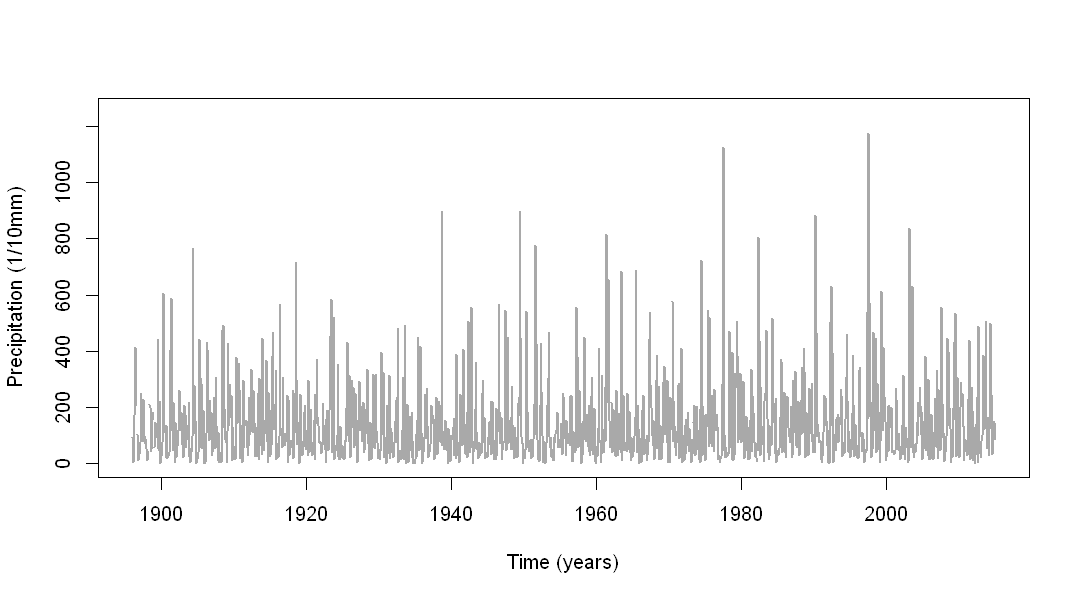

In [82]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1250))

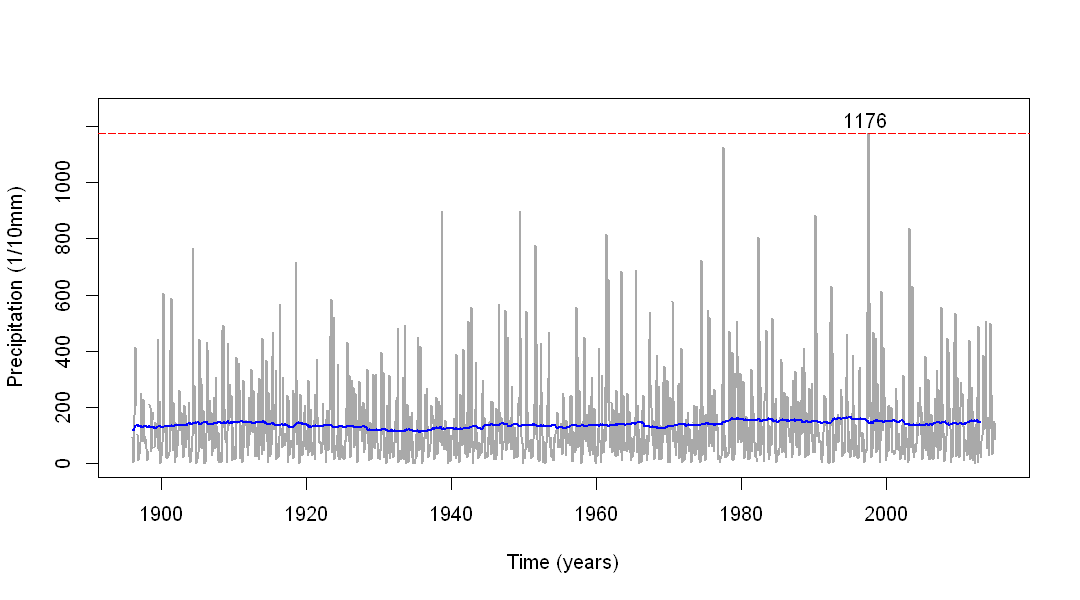

In [86]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1250))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1997,maxObs+50,
           sprintf("%i",maxObs))

In [145]:
smooth = runmean(data$Max.PRCP., 120)

In [146]:
smoothTS = ts(smooth, start=firstYear, freq=12)

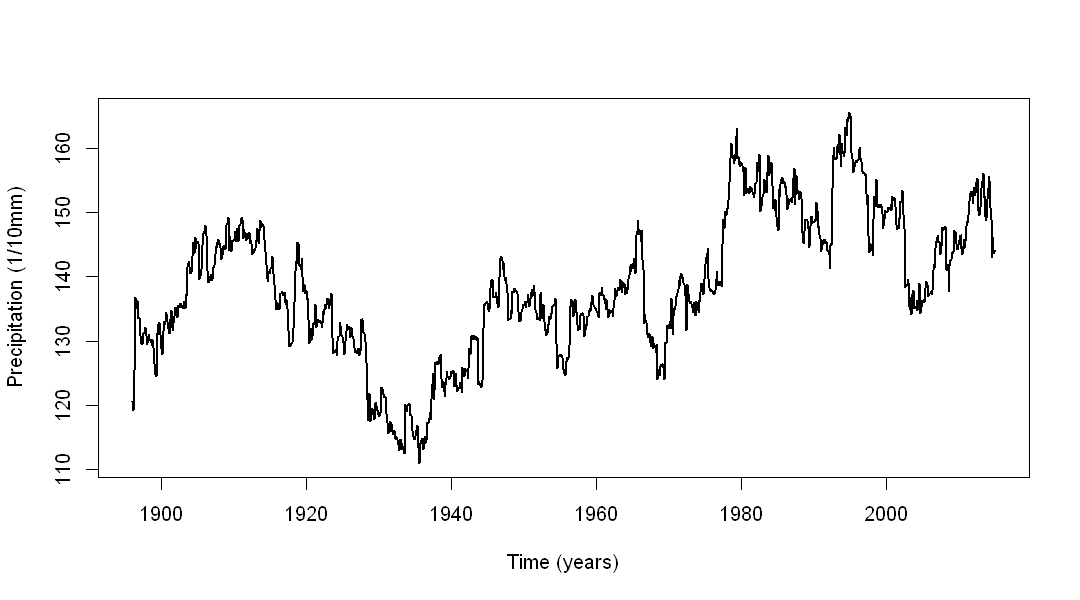

In [147]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )


In [148]:
smoothALL = runmean(data$Max.PRCP., 1428/2)

In [149]:
length(smoothALL)

[1] 1428

In [150]:
smoothALLTS = ts(smoothALL, start = 1896, freq=12)

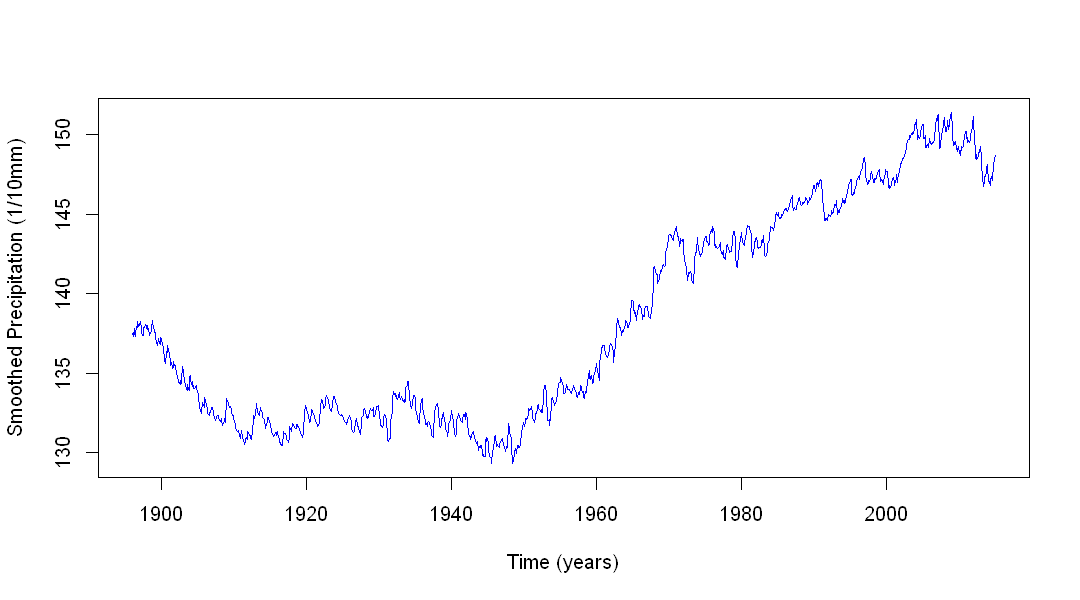

In [151]:
plot(smoothALLTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")

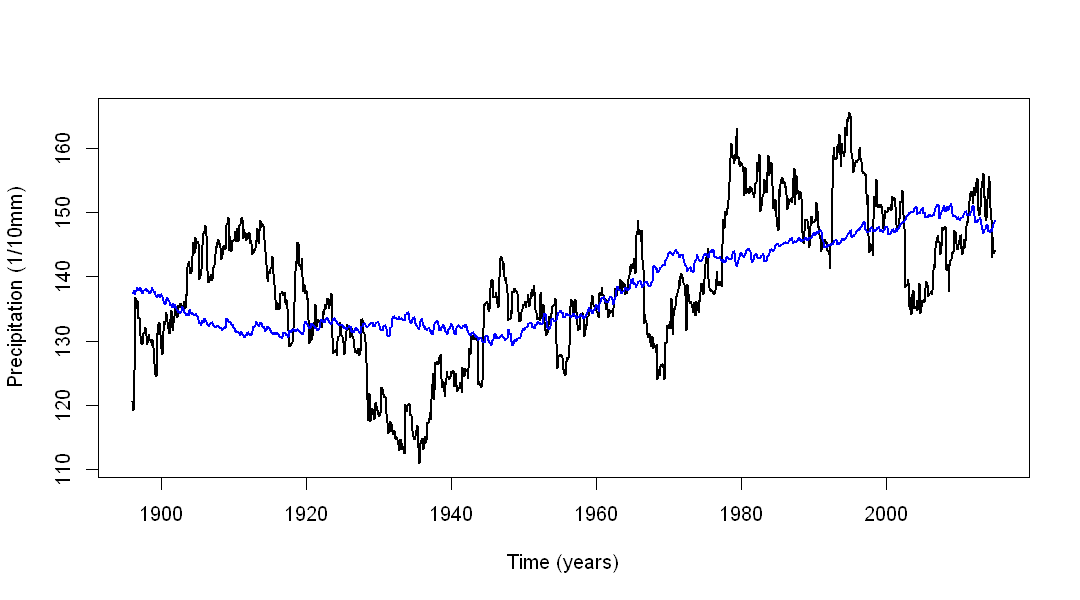

In [152]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(smoothALLTS, col=4, lwd=2)

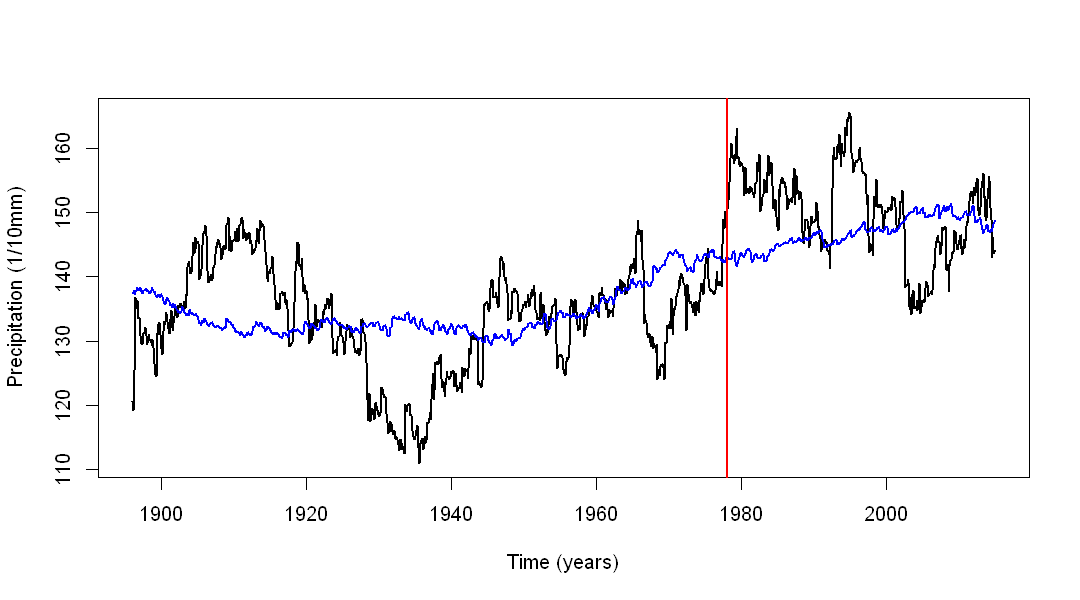

In [165]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(smoothALLTS, col=4, lwd=2)
abline(v=1978,col=2,lwd=2)

### Change point detection for mean signal

In [154]:
require(changepoint)

In [155]:
cpt.mean(smoothTS)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.79209 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 976 

In [156]:
smoothTS[976]

[1] 138.4492

In [157]:
976/12

[1] 81.33333

In [158]:
shapiro.test(smoothTS)


	Shapiro-Wilk normality test

data:  smoothTS
W = 0.99003, p-value = 2.748e-08


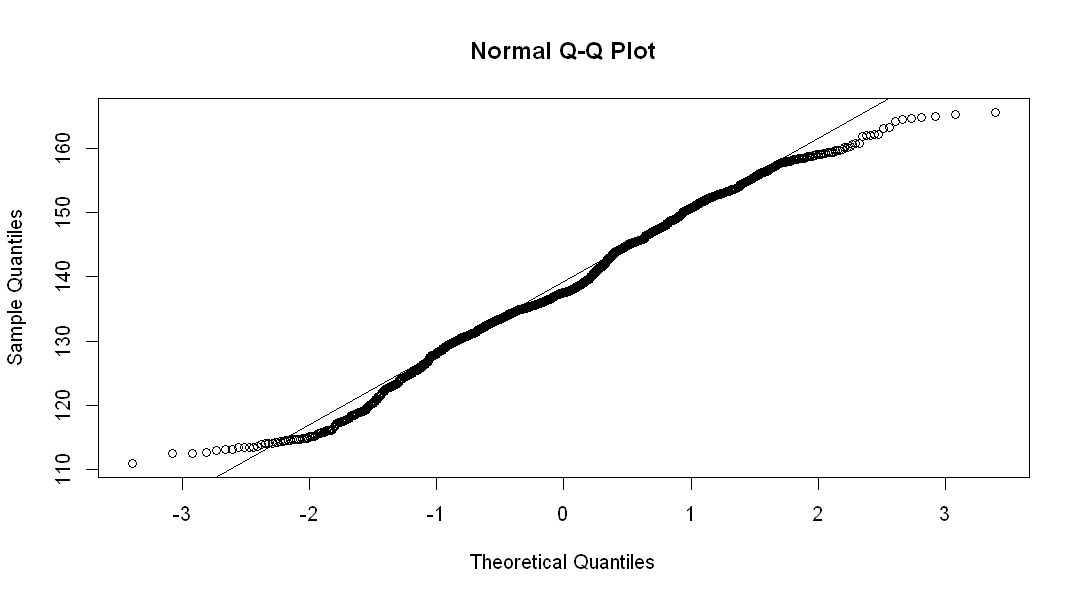

In [159]:
qqnorm(smoothTS);qqline(smoothTS)

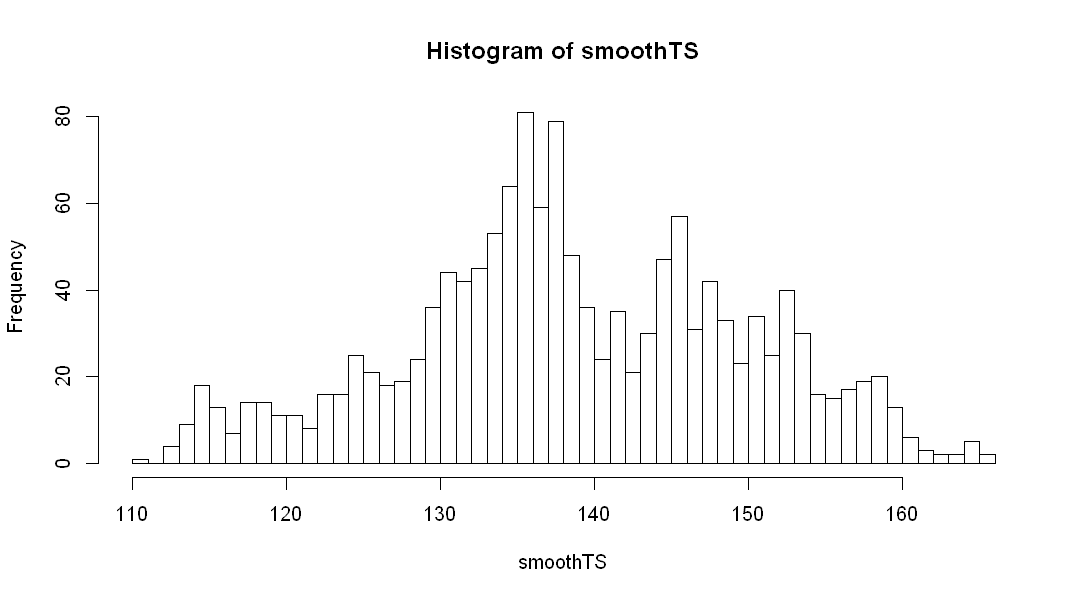

In [160]:
hist(smoothTS,breaks=40)

In [161]:
smoothTS[970:985]

[1] 138.7311 138.8992 139.3109 138.6471 138.6303 139.2034 138.4492 144.9661
 [9] 145.8136 148.8644 147.5932 149.3559 150.1356 149.6864 149.6017 150.6239

In [162]:
1895+83

[1] 1978

In [141]:
length(smoothTS)/12

[1] 119

In [166]:
anotherTS = smoothTS

In [168]:
mean1sthalf = mean(smoothTS[1:976])
mean2ndhalf = mean(smooth[976:length(smoothTS)])

In [169]:
anotherTS[1:976] = mean1sthalf
anotherTS[976:length(smoothTS)] = mean2ndhalf

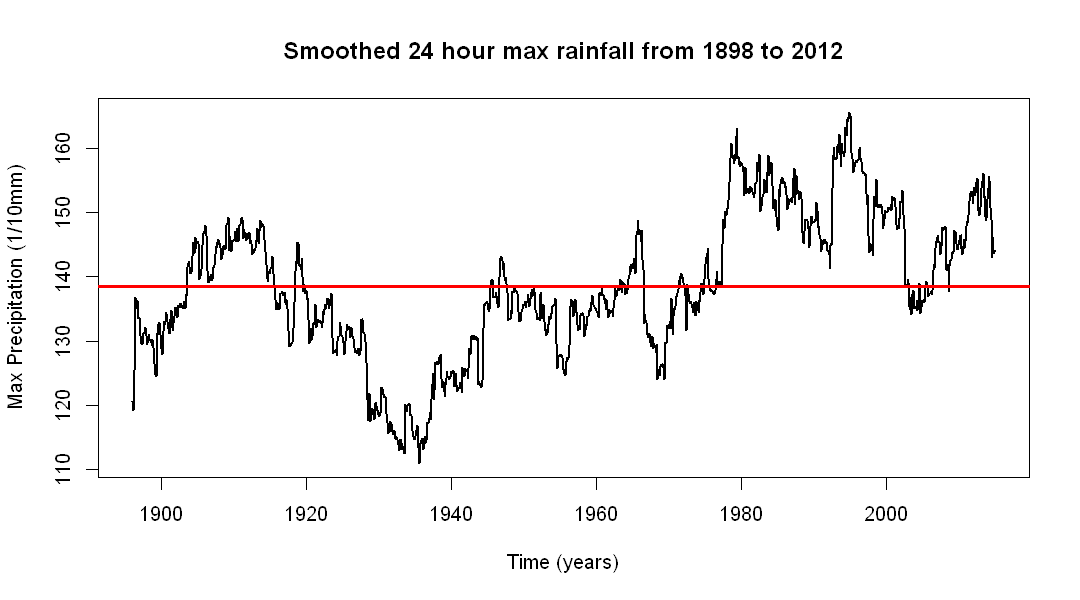

In [71]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    abline(h=mean(na.omit(data$Max.PRCP.)),col=2,lwd=3)

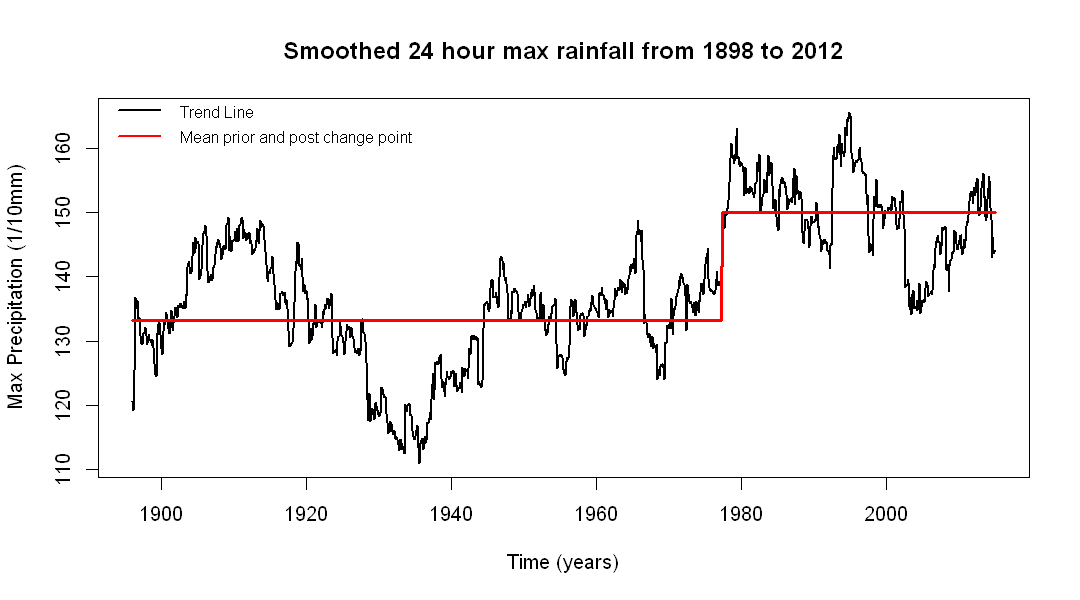

In [171]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Mean prior and post change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)

In [200]:
data["box"] = as.numeric(data$YEAR>=1978)

In [201]:
mean(na.omit(data2[which(data$box == 0),"Max.PRCP."]))

[1] 133.0533

In [202]:
mean(na.omit(data2[which(data$box == 1),"Max.PRCP."]))

[1] 150.0295

Box plots with noise from the event

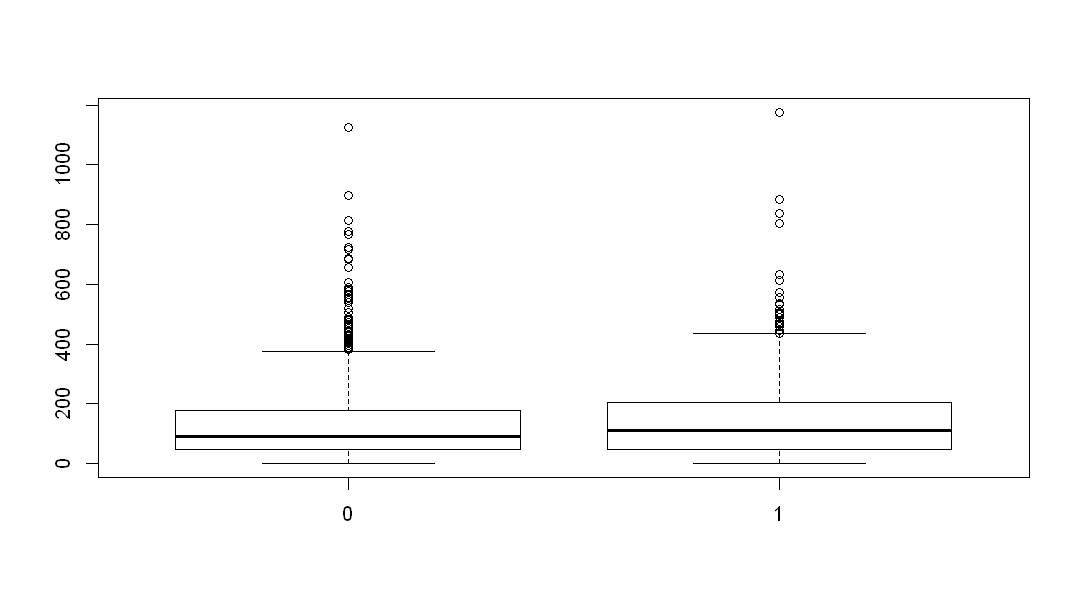

In [203]:
boxplot(data$Max.PRCP.~data$box)

A little less noise in the box plots by removing the event

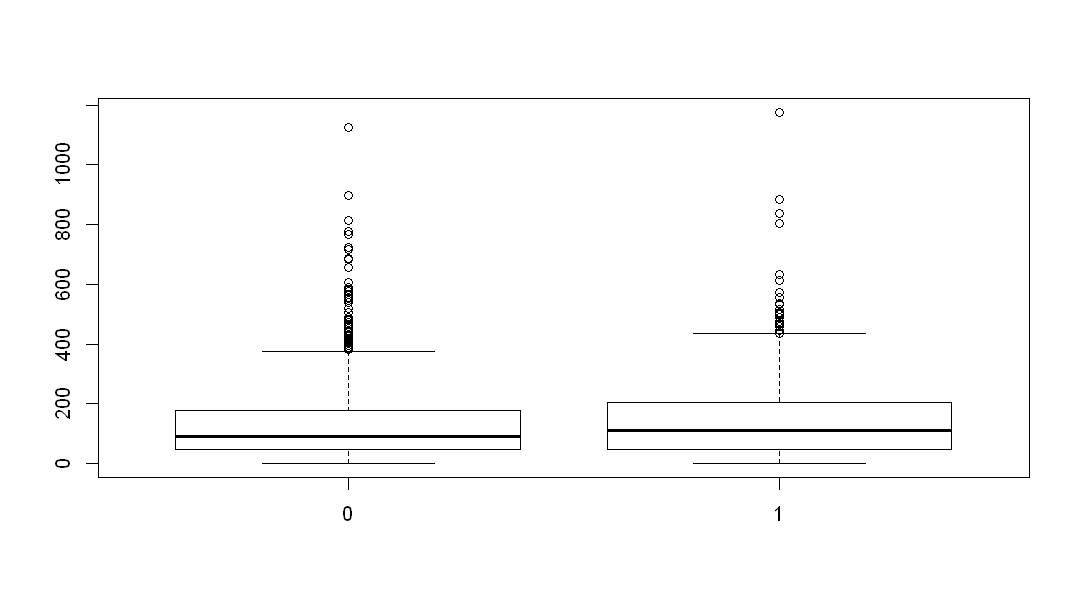

In [204]:
boxplot(data$Max.PRCP.~data$box)

In [205]:
indicator = c(rep(0,1007),rep(1,(397+24)))

In [206]:
length(indicator)

[1] 1428

In [216]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [208]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),119)))

In [209]:
names(meansBoxSea) = c("precipitation","month")

Now, can see the difference in the mean of the smoothed signals, however, given the actual variance of the data, the significance here is debatable - not to mention the independence assumption is not valid.

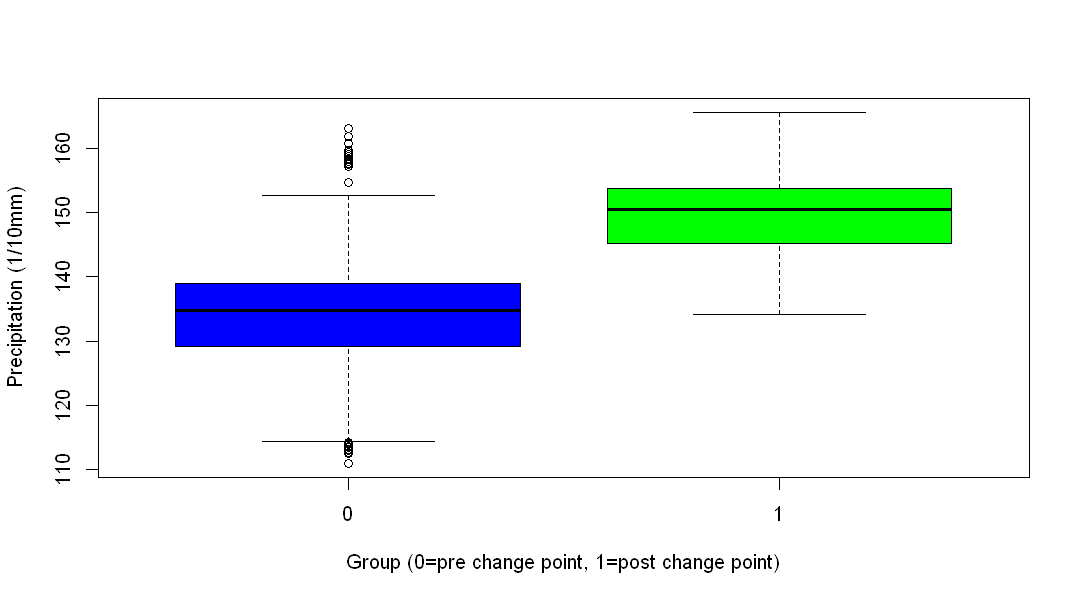

In [210]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

#  Variances

In [217]:
vars1 = NULL
for(i in 1:(length(max_PRCP))){
    vars1 = c(vars1,var(na.omit(max_PRCP[,i])))
}
vars1TS = ts(vars1, start = firstYear)

In [218]:
vars1TS

Time Series:
Start = 1896 
End = 2005 
Frequency = 1 
  [1] 17132.24 17677.51 17912.33 19677.28 19770.37 18721.59 16125.19 16460.47
  [9] 17512.64 14540.66 14689.79 15050.07 14845.88 15935.55 15455.63 14519.03
 [17] 14753.16 14319.76 18535.31 18501.20 17857.39 16471.50 16521.46 13537.75
 [25] 13761.54 14640.60 14634.97 15801.85 11707.51 11468.71 12026.85 11840.48
 [33] 11595.92 16297.79 15885.14 15293.37 15658.78 18373.73 17304.37 17652.75
 [41] 16094.08 17579.49 20111.56 15176.31 20985.87 21969.79 25372.25 22826.83
 [49] 23472.03 22848.96 22830.26 21355.61 21017.81 21669.77 16268.04 15745.51
 [57] 18597.63 17659.00 19113.17 19469.10 22040.06 22215.61 22316.76 22566.00
 [65] 22637.99 23726.30 17990.42 17754.49 15277.50 18127.67 18185.35 17935.23
 [73] 24621.77 25441.96 26969.18 25023.21 24271.05 29196.00 30871.52 29043.74
 [81] 27469.42 27315.29 18827.34 18181.66 16405.06 21490.26 21483.60 20336.29
 [89] 18230.95 18051.63 17934.97 18622.73 30068.36 30474.60 32557.70 27551.27
 [97] 2767

In [219]:
rollSmall = ts(runmean(vars1TS,15),start=firstYear)
rollSmall2 = ts(runmean(vars1TS,30),start=firstYear)
rollSmall3 = ts(runmean(vars1TS,50),start=firstYear)

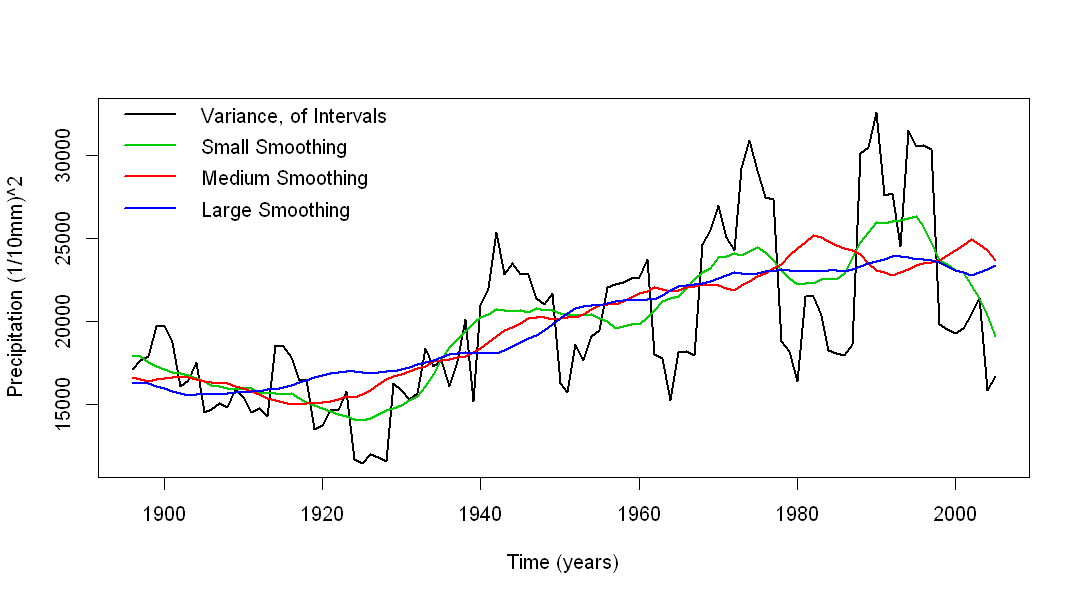

In [220]:
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topleft",c("Variance, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")

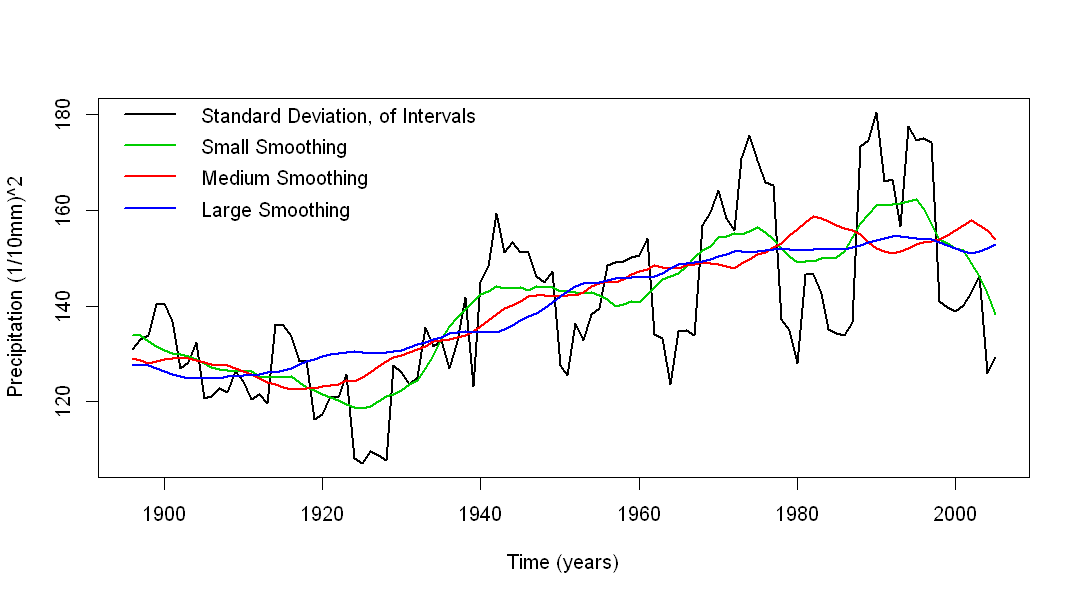

In [221]:
plot(sqrt(vars1TS), type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(sqrt(rollSmall), col=3,lwd=2)
lines(sqrt(rollSmall2), col=2,lwd=2)
lines(sqrt(rollSmall3), col=4,lwd=2)
legend("topleft",c("Standard Deviation, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")